<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [2]:
import sqlalchemy
from sqlalchemy import text
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go

# установка соединения
f = 'project_db.yaml'
d = {f'{k.strip()}': v.strip() for k, v in (l.split(':') for l in open(f))}
url = f"postgresql+psycopg2://{d['user']}:{d['password']}@{d['host']}:{d['port']}/{d['dbname']}"
engine = sqlalchemy.create_engine(url)
conn = engine.connect()

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе. 

In [3]:
# текст запроса
query_3_1 = '''SELECT COUNT(*) AS cnt
               FROM vacancies
'''

In [4]:
# результат запроса
answer_3_1 = pd.DataFrame(conn.execute(text(query_3_1)).fetchall())
display(answer_3_1)

,cnt
0,49197


2. Напишите запрос, который посчитает количество работодателей. 

In [5]:
# текст запроса
query_3_2 = '''SELECT COUNT(*) AS cnt
               FROM employers
'''

In [6]:
# результат запроса
answer_3_2 = pd.DataFrame(conn.execute(text(query_3_2)).fetchall())
display(answer_3_2)

,cnt
0,23501


3. Посчитате с помощью запроса количество регионов.

In [7]:
# текст запроса
query_3_3_1 = '''SELECT COUNT(*) AS cnt
                 FROM areas
'''

In [8]:
# результат запроса
answer_3_3_1 = pd.DataFrame(conn.execute(text(query_3_3_1)).fetchall())
display(answer_3_3_1)

,cnt
0,1362


In [9]:
n = 10
query_3_3_2 = f'''SELECT *
                  FROM areas
                  LIMIT {n}
'''
answer_3_3_2 = pd.DataFrame(conn.execute(text(query_3_3_2)).fetchall())
display(answer_3_3_2)

,id,name
0,2758,Тбилиси
1,8,Майкоп
2,1180,Нерюнгри
3,1240,Новокузнецк
4,2,Санкт-Петербург
5,1,Москва
6,2061,Подольск (Московская область)
7,1545,Новочеркасск
8,2759,Ташкент
9,3695,Промышленная


4. Посчитате с помощью запроса количество сфер деятельности в базе.

In [10]:
# текст запроса
query_3_4 = '''SELECT COUNT(*) AS cnt
               FROM industries
'''

In [11]:
# результат запроса
answer_3_4 = pd.DataFrame(conn.execute(text(query_3_4)).fetchall())
display(answer_3_4)

,cnt
0,294


***

### Выводы по предварительному анализу данных
В целом, предварительный анализ указывает на наличие множества вакансий, разнообразных работодателей,
географических областей и сфер деятельности. Работодателей практически в 2 раза меньше, чем
вакансий. Это говорит о том, что средний работодатель публикует не больше 2 вакансий, либо большое количество
работодателей не имеют вообще опубликованных вакансий. Это следует выяснить в дальнейшем анализе.

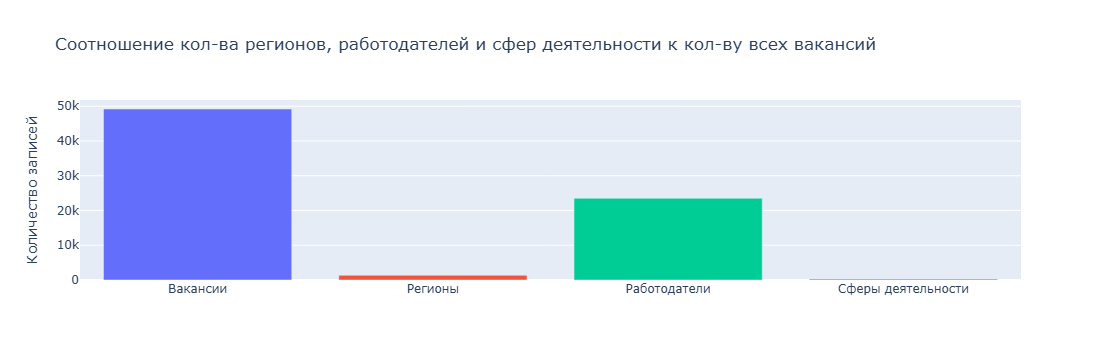

In [14]:
answers_list = [answer_3_1.cnt, answer_3_3_1.cnt, answer_3_2.cnt, answer_3_4.cnt]

x = [int(item.iloc[0]) if isinstance(item, pd.Series) else int(item) for item in answers_list]

fig = px.bar(
    x,
    labels={'value': 'Количество записей'},
    title='Соотношение кол-ва регионов, работодателей и сфер деятельности к кол-ву всех вакансий',
    color=[str(i) for i in range(0, 4)]
)

fig.update_layout(
    showlegend=False,
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(answers_list))),
        ticktext=['Вакансии', 'Регионы', 'Работодатели', 'Сферы деятельности'],
        title=''
    )
)

fig.show()

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько вакансий в каждом регионе.
Отсортируйте по количеству вакансий в порядке убывания.

In [15]:
# текст запроса
n = 15
query_4_1 = f'''SELECT a.name AS area, COUNT(*) AS cnt
                FROM vacancies v
                LEFT JOIN areas a ON v.area_id = a.id
                GROUP BY a.id
                ORDER BY cnt DESC
                LIMIT {n}
'''

In [16]:
# результат запроса
answer_4_1 = pd.DataFrame(conn.execute(text(query_4_1)).fetchall())
display(answer_4_1)

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


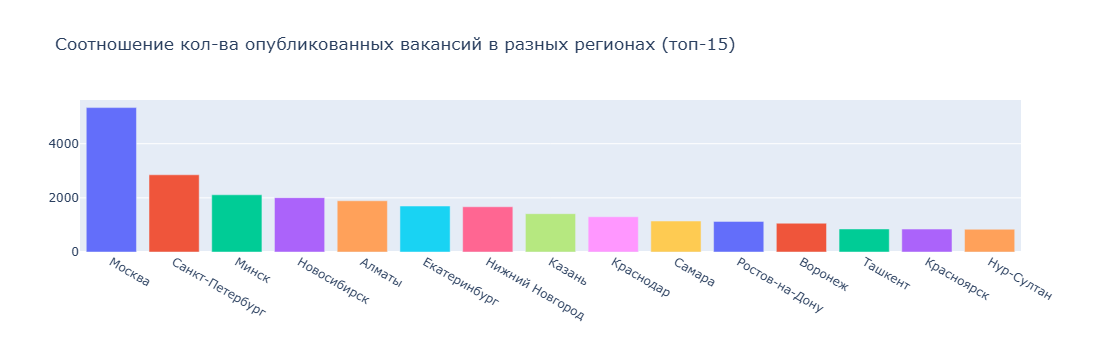

In [17]:
fig = px.bar(
    y=answer_4_1.cnt,
    x=answer_4_1.area,
    color=[str(x) for x in range(0, len(answer_4_1))],
    title='Соотношение кол-ва опубликованных вакансий в разных регионах (топ-15)',
    labels={'y': 'Количество вакансий в регионе', 'x': 'Город'}
)

fig.update_layout(
    showlegend=False,
    xaxis=dict(title=''),
    yaxis=dict(title='')
)

fig.show()

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [18]:
# текст запроса
query_4_2 = '''SELECT COUNT(*) AS cnt
               FROM vacancies
               WHERE salary_to IS NOT NULL OR salary_from IS NOT NULL

'''

In [19]:
# результат запроса
answer_4_2 = pd.DataFrame(conn.execute(text(query_4_2)).fetchall())
display(answer_4_2)

,cnt
0,24073


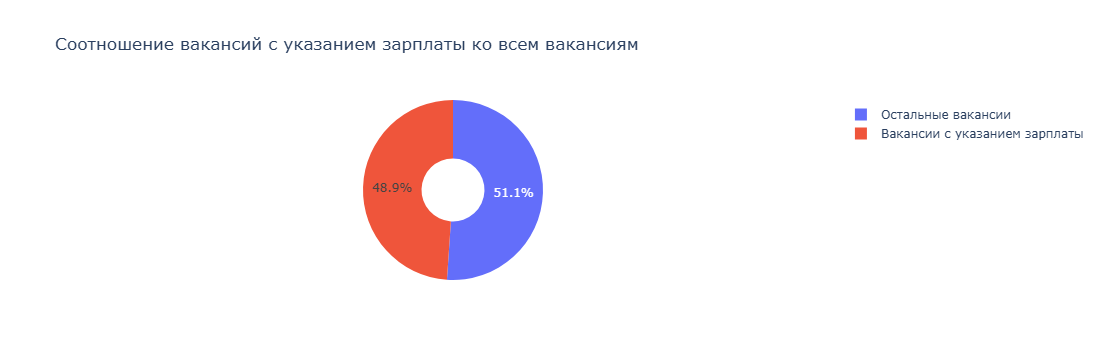

In [21]:
answers_list = [answer_4_2.cnt, answer_3_1.cnt - answer_4_2.cnt]

x = [int(item.iloc[0]) if isinstance(item, pd.Series) else int(item) for item in answers_list]

fig = px.pie(
        values=x,
        names=['Вакансии с указанием зарплаты', 'Остальные вакансии'],
        title='Соотношение вакансий с указанием зарплаты ко всем вакансиям',
        hole=0.35
)

fig.show()


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [22]:
# текст запроса
query_4_3 = '''SELECT ROUND(AVG(salary_from)) AS average_min,
                      ROUND(AVG(salary_to)) AS average_max
               FROM vacancies
'''

In [23]:
# результат запроса
answer_4_3 = pd.DataFrame(conn.execute(text(query_4_3)).fetchall())
display(answer_4_3)

,average_min,average_max
0,71065,110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [24]:
# текст запроса
query_4_4 = '''SELECT employment, schedule, COUNT(*) AS cnt
               FROM vacancies
               GROUP BY employment, schedule
               ORDER BY cnt DESC
'''

In [25]:
# результат запроса
answer_4_4 = pd.DataFrame(conn.execute(text(query_4_4)).fetchall())
display(answer_4_4)

,employment,schedule,cnt
0,Полная занятость,Полный день,35367
1,Полная занятость,Удаленная работа,7802
2,Полная занятость,Гибкий график,1593
3,Частичная занятость,Удаленная работа,1312
4,Полная занятость,Сменный график,940
5,Стажировка,Полный день,569
6,Полная занятость,Вахтовый метод,367
7,Частичная занятость,Полный день,347
8,Частичная занятость,Гибкий график,312
9,Проектная работа,Полный день,141


In [122]:
fig = px.imshow(
        answer_4_4.pivot('employment', 'schedule', 'cnt'),
        text_auto = True, 
        aspect = 'auto',
        color_continuous_scale = 'peach'
)

fig.update_layout(
    title='Тепловая карта популярности сочетаний типов трудоустройства и занятости',
    xaxis=dict(title=''),
    yaxis=dict(title='')
)

fig.show()

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [26]:
# текст запроса
query_4_5 = '''SELECT experience, COUNT(*) AS cnt
               FROM vacancies
               GROUP BY experience
               ORDER BY cnt 
'''

In [27]:
# результат запроса
answer_4_5 = pd.DataFrame(conn.execute(text(query_4_5)).fetchall())
display(answer_4_5)

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


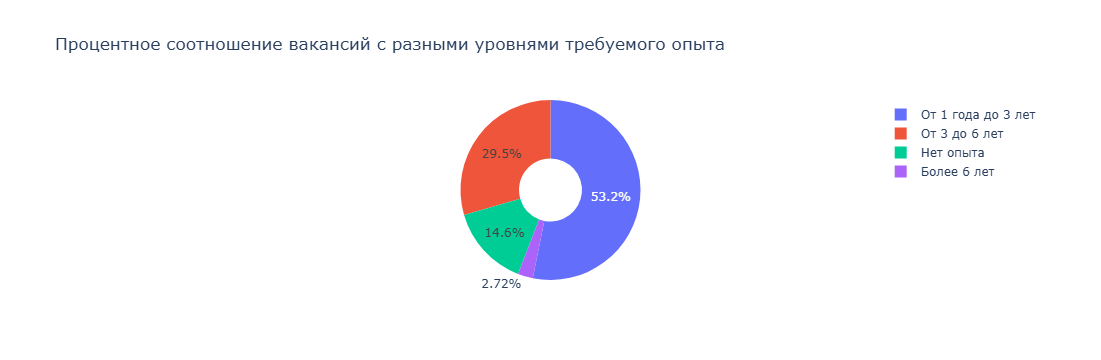

In [28]:
fig = px.pie(
        values = answer_4_5.cnt,
        names = answer_4_5.experience,
        title='Процентное соотношение вакансий с разными уровнями требуемого опыта',
        hole=0.35
)

fig.show()

***

### Выводы по детальному анализу вакансий<br>
67% вакансий ожидают минимальный опыт работы у кандидатов или вообще его не требуют. Из этого следует, что, в целом, 
вакансии в подборке ориентированы на молодых людей, которые начинают карьеру.<br>
4 самых распространенных сочетания занятости в вакансиях - полная занятость и полный день (35367), полная занятость и 
удаленная работа (7802), полная занятость и гибкий график (1593), удаленная работа и частичная занятость (1312). Все еще бóльшую часть вакансий составляет работа офлайн, тем не менее уже на втором месте по популярности стоит сочетание "полная занятость и удаленная работа". При этом нет уверенности утверждать, что все работодатели подразумевали именно работу офлайн под "полная занятость и полный рабочий день", что является наиболее популярным сочетанием в базе. Таким образом, видно, что значительная часть предлагаемых вакансий в базе - дистанционные, а, значит, предполагает интеллектуальную работу.<br> 
Всего в 48.9% вакансий прописана предлагаемая зарплата. Что не очень хорошо, поскольку при поиске вакансий, соискатели чаще всего указывают желаемую зарплату и, в таком случае, неизвестно насколько корректно отображаются в подборке все те вакансии, где информации о зарплате нет.<br>
В топе-15 наиболее популярных регионов в базе есть Минск, Алматы, Ташкент, Астана (Нур-Султан), помимо российких городов. Из этого следует, что база международная и ею могут пользоваться соискатели разных стран.<br> 
Думаю, что дополнительно важно было бы провести исследоване того, как отображаются вакансии без указания зарплаты при поиске с указанным фильтром зарплат. Возможно, это сильно влияет на корректность работы базы. Из возможных решений: вакансии без указания зарплаты, но подходящие по другим фильтрам, выводить в конце списка; убрать техническую возможность создавать открытую вакансию без указания зарплаты.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [29]:
# текст запроса
n = 5
query_5_1 = f'''SELECT e.name, COUNT(*) AS cnt
                FROM vacancies v
                LEFT JOIN employers e ON v.employer_id = e.id
                GROUP BY e.name
                ORDER BY cnt DESC
                LIMIT {n}
'''

In [30]:
# результат запроса
answer_5_1 = pd.DataFrame(conn.execute(text(query_5_1)).fetchall())[::4]
display(answer_5_1)

,name,cnt
0,Яндекс,1933
4,Газпром нефть,331


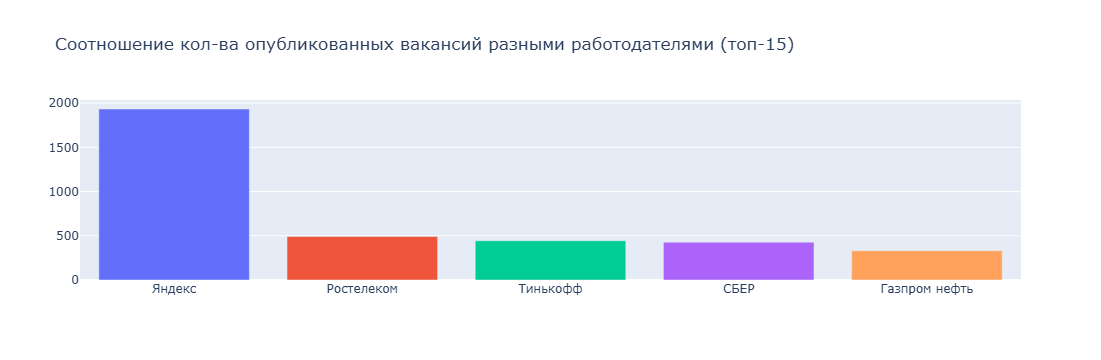

In [31]:
n = 15
query_for_chart_5_1 = f'''SELECT e.name, COUNT(*) AS cnt
                FROM vacancies v
                LEFT JOIN employers e ON v.employer_id = e.id
                GROUP BY e.name
                ORDER BY cnt DESC
                LIMIT {n}
'''

answer_for_chart_5_1 = pd.DataFrame(conn.execute(text(query_5_1)).fetchall())

fig = px.bar(
    y=answer_for_chart_5_1.cnt,
    x=answer_for_chart_5_1.name,
    color=[str(x) for x in range(0, len(answer_for_chart_5_1))],
    title='Соотношение кол-ва опубликованных вакансий разными работодателями (топ-15)',
    labels={'y': 'Количество вакансий от работодателя', 'x': 'Работодатель'}
)

fig.update_layout(
    showlegend=False,
    xaxis=dict(title=''),
    yaxis=dict(title='')
)

fig.show()

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [32]:
# текст запроса
query_5_2_1 = '''SELECT a.name, COUNT(DISTINCT e.id) AS employers_cnt, COUNT(DISTINCT v.id) AS vacancies_cnt
                 FROM areas a
                 LEFT JOIN vacancies v ON v.area_id = a.id
                 LEFT JOIN employers e ON e.area = a.id
                 GROUP BY a.id
                 ORDER BY vacancies_cnt, employers_cnt
'''

In [33]:
# результат запроса
answer_5_2_1 = pd.DataFrame(conn.execute(text(query_5_2_1)).fetchall())
display(answer_5_2_1)

,name,employers_cnt,vacancies_cnt
0,Петров Вал,0,0
1,Макушино,0,0
2,Петухово,0,0
3,Шадринск,0,0
4,Шумиха,0,0
...,...,...,...
1357,Алматы,721,1892
1358,Новосибирск,573,2006
1359,Минск,1115,2112
1360,Санкт-Петербург,2217,2851


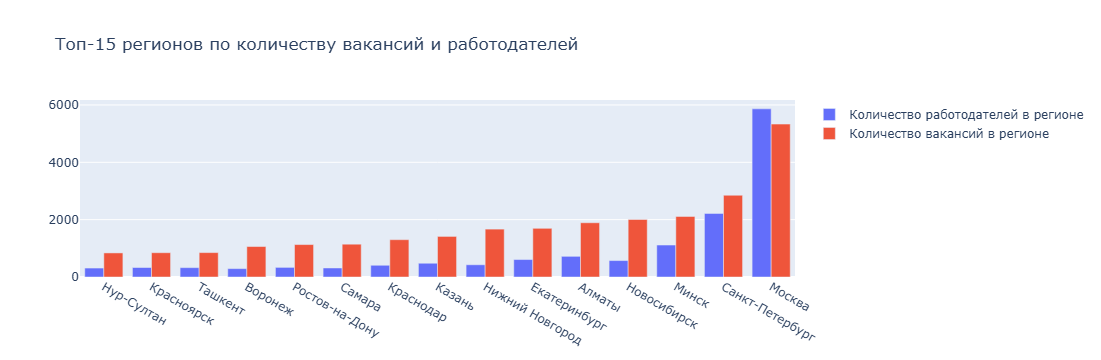

In [34]:
fig = go.Figure(data=[
    go.Bar(name='Количество работодателей в регионе', x=answer_5_2_1[-15:].name, y=answer_5_2_1[-15:].employers_cnt),
    go.Bar(name='Количество вакансий в регионе', x=answer_5_2_1[-15:].name, y=answer_5_2_1[-15:].vacancies_cnt)
])

fig.update_layout(
    barmode='group',
    title='Топ-15 регионов по количеству вакансий и работодателей'
)

fig.show()

In [35]:
# текст запроса
n = 1
query_5_2_2 = f'''SELECT a.name, COUNT(DISTINCT e.id) AS employers_cnt, COUNT(DISTINCT v.id) AS vacancies_cnt
                  FROM areas a
                  LEFT JOIN vacancies v ON v.area_id = a.id
                  LEFT JOIN employers e ON e.area = a.id
                  GROUP BY a.id
                  HAVING COUNT(DISTINCT v.id) = 0
                  ORDER BY employers_cnt DESC
                  LIMIT {n}
'''

In [36]:
# результат запроса
answer_5_2_2 = pd.DataFrame(conn.execute(text(query_5_2_2)).fetchall())
display(answer_5_2_2)

,name,employers_cnt,vacancies_cnt
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [37]:
# текст запроса
query_5_3 = '''SELECT e.name, COUNT(DISTINCT v.area_id) AS areas_cnt
               FROM employers e
               LEFT JOIN vacancies v ON v.employer_id = e.id
               GROUP BY e.id
               ORDER BY areas_cnt DESC
'''

In [38]:
# результат запроса
answer_5_3 = pd.DataFrame(conn.execute(text(query_5_3)).fetchall())
display(answer_5_3)

,name,areas_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23496,Но Смокинг,0
23497,МАСТЕРСКАЯ CREED,0
23498,Dzing Finance,0
23499,КОРС,0


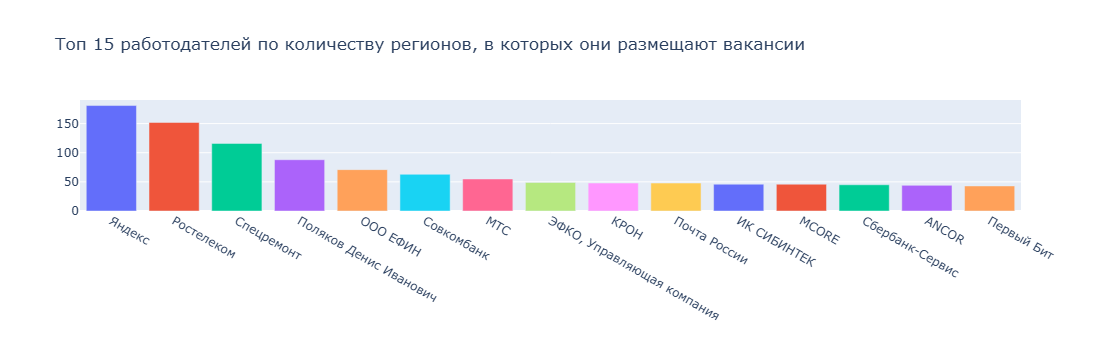

In [39]:
fig = px.bar(
    y=answer_5_3[0:15].areas_cnt,
    x=answer_5_3[0:15].name,
    color=[str(x) for x in range(0, len(answer_5_3[0:15]))],
    title='Топ 15 работодателей по количеству регионов, в которых они размещают вакансии',
    labels={'y': 'Количество регионов', 'x': 'Работодатель'}
)

fig.update_layout(
    showlegend=False,
    xaxis=dict(title=''),
    yaxis=dict(title='')
)

fig.show()

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [40]:
# текст запроса
query_5_4 = '''SELECT COUNT(*) AS cnt
               FROM employers e
               LEFT JOIN employers_industries ei ON ei.employer_id = e.id
               WHERE industry_id IS NULL
'''

In [41]:
# результат запроса
answer_5_4 = pd.DataFrame(conn.execute(text(query_5_4)).fetchall())
display(answer_5_4)

,cnt
0,8419


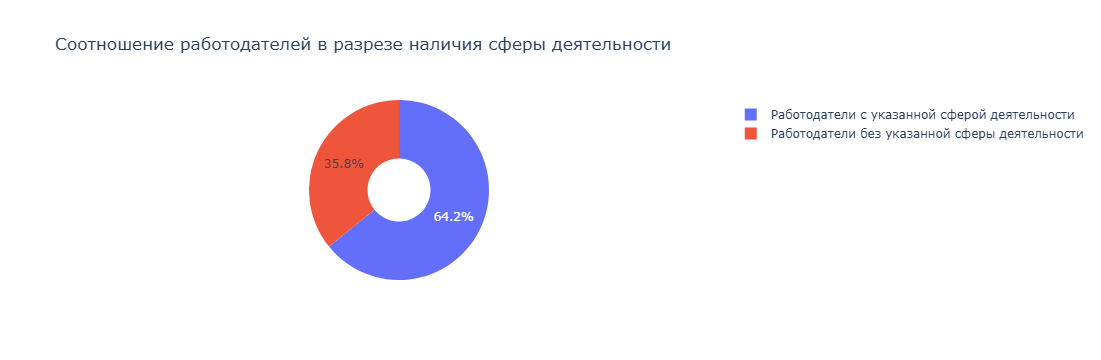

In [43]:
answers_list = [answer_5_4.cnt, answer_3_2.cnt - answer_5_4.cnt]

x = [int(item.iloc[0]) if isinstance(item, pd.Series) else int(item) for item in answers_list]

fig = px.pie(
        values = x,
        names = ['Работодатели без указанной сферы деятельности', 'Работодатели с указанной сферой деятельности'],
        title='Соотношение работодателей в разрезе наличия сферы деятельности',
        hole=0.35
)

fig.show()

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [44]:
# текст запроса
n = 1
m = 2
query_5_5 = f'''SELECT e.name, COUNT(*) AS industries_cnt
                FROM employers e
                LEFT JOIN employers_industries ei ON ei.employer_id = e.id
                GROUP BY e.id
                HAVING COUNT(*) = 4
                ORDER BY e.name
                OFFSET {m}
                LIMIT {n}
'''

In [45]:
# результат запроса
answer_5_5 = pd.DataFrame(conn.execute(text(query_5_5)).fetchall())
display(answer_5_5)

,name,industries_cnt
0,2ГИС,4


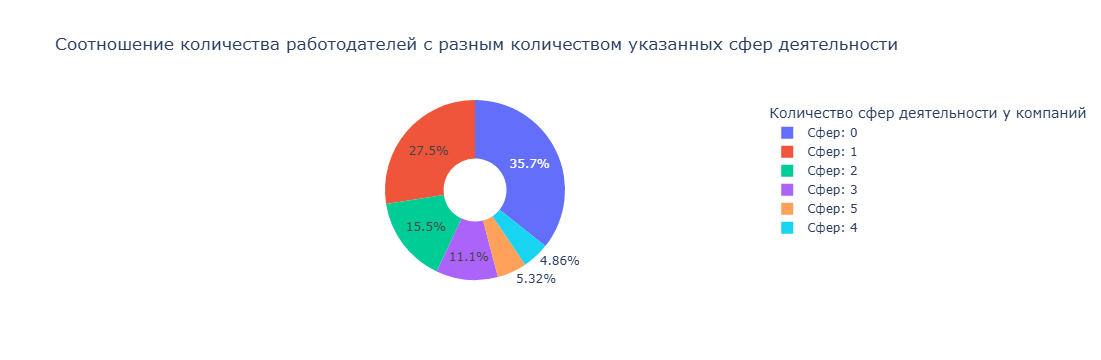

In [46]:
query_for_chart_5_5 = '''WITH temp_table AS (
                                            SELECT e.name, 0 AS industries_cnt
                                            FROM employers e
                                            LEFT JOIN employers_industries ei ON ei.employer_id = e.id
                                            WHERE industry_id IS NULL
                                            UNION
                                            SELECT e.name, COUNT(*) AS industries_cnt
                                            FROM employers e
                                            LEFT JOIN employers_industries ei ON ei.employer_id = e.id
                                            WHERE industry_id IS NOT NULL
                                            GROUP BY e.id
                        )
                        SELECT industries_cnt, COUNT(name) AS cnt_of_employers
                        FROM temp_table
                        GROUP BY industries_cnt
                        ORDER BY industries_cnt
'''

answer_for_chart_5_5 = pd.DataFrame(conn.execute(text(query_for_chart_5_5)).fetchall())

fig = px.pie(
        values = answer_for_chart_5_5.cnt_of_employers,
        names = [f'Сфер: {cnt}' for cnt in answer_for_chart_5_5.industries_cnt.tolist()],
        title='Соотношение количества работодателей с разным количеством указанных сфер деятельности',
        hole=0.35
)

fig.update_layout(legend=dict(title='Количество сфер деятельности у компаний'))

fig.show()

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [47]:
# текст запроса
query_5_6 = '''SELECT COUNT(*) AS cnt
               FROM employers_industries ei
               LEFT JOIN industries i ON i.id = ei.industry_id
               LEFT JOIN employers e ON e.id = ei.employer_id
               WHERE i.name = 'Разработка программного обеспечения'
'''

In [48]:
# результат запроса
answer_5_6 = pd.DataFrame(conn.execute(text(query_5_6)).fetchall())
display(answer_5_6)

,cnt
0,3553


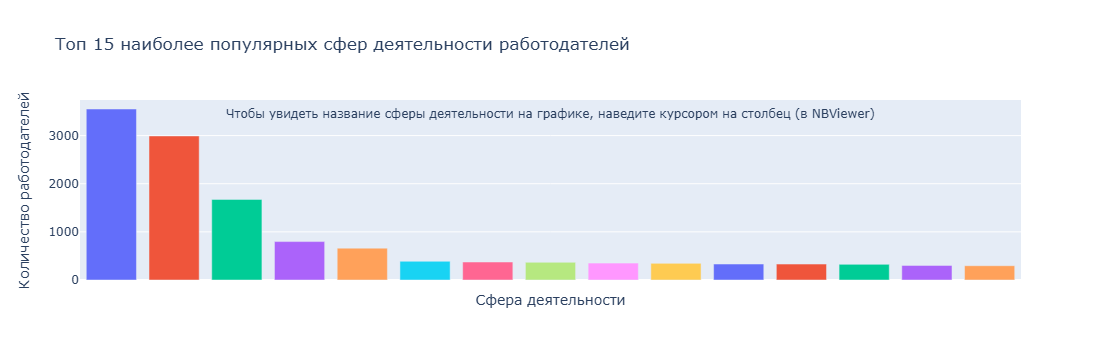

In [49]:
query_for_chart_5_6 = '''SELECT i.name, COUNT(ei.industry_id) AS cnt
                         FROM employers_industries ei
                         LEFT JOIN industries i ON i.id = ei.industry_id
                         GROUP BY i.name
                         ORDER BY cnt DESC 
'''

answer_for_chart_5_6 = pd.DataFrame(conn.execute(text(query_for_chart_5_6)).fetchall())

fig = px.bar(
    y=answer_for_chart_5_6[0:15].cnt,
    x=answer_for_chart_5_6[0:15].name,
    color=[str(x) for x in range(0, 15)],
    title='Топ 15 наиболее популярных сфер деятельности работодателей',
    labels={'y': 'Количество работодателей', 'x': 'Сфера деятельности'}
)

fig.update_layout(
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.3
    ),
    showlegend=False,
    xaxis=dict(showticklabels=False)
)

fig.add_annotation(text='Чтобы увидеть название сферы деятельности на графике, наведите курсором на столбец (в NBViewer)', 
                    align='center',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.5,
                    y=0.98)

fig.show()

Чтобы увидеть название сферы деятельности на графике, наведите курсором на столбец (в NBViewer)

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8).

In [50]:
import urllib.parse as req

# настраиваю доступ к странице Википедии со списком городов-миллионников
path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)

df_mill_cities = pd.read_html(url)[1]

In [51]:
# текст запроса
query_5_7 = f'''WITH temp AS (
                              SELECT a.name AS area, COUNT(*) AS vacancies_cnt
                              FROM vacancies v 
                              LEFT JOIN areas a ON v.area_id = a.id
                              LEFT JOIN employers e ON e.id = v.employer_id
                              WHERE e.name = 'Яндекс'
                              GROUP BY e.name, a.id
                              ORDER BY vacancies_cnt
                              )
                SELECT *
                FROM temp
                WHERE area IN {tuple(df_mill_cities['Город'])}

                UNION ALL

                SELECT 'Total_in_mill_cities', SUM(vacancies_cnt)
                FROM temp
                WHERE area IN {tuple(df_mill_cities['Город'])}

                UNION ALL

                SELECT 'Total', SUM(vacancies_cnt)
                FROM temp
'''

In [52]:
# результат запроса
answer_5_7 = pd.DataFrame(conn.execute(text(query_5_7)).fetchall())
display(answer_5_7)

,area,vacancies_cnt
0,Тюмень,20
1,Саратов,23
2,Total_in_mill_cities,43
3,Total,1933


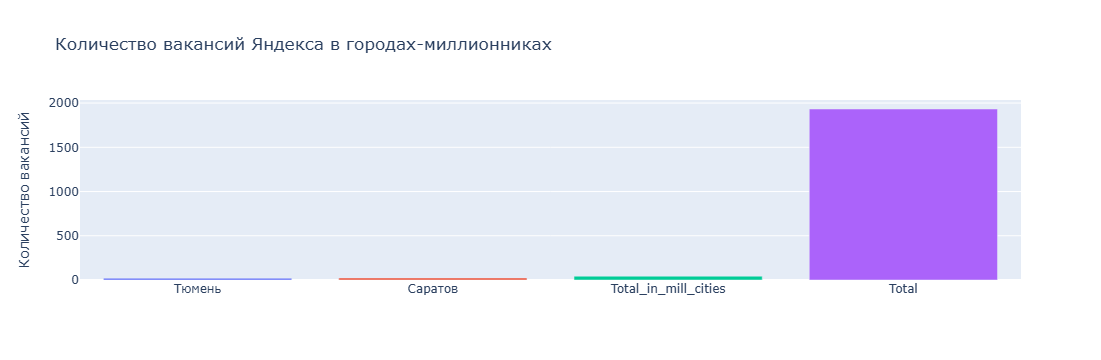

In [53]:
fig = px.bar(
    y=answer_5_7.vacancies_cnt,
    x=answer_5_7.area,
    color=[str(x) for x in range(0, len(answer_5_7))],
    title='Количество вакансий Яндекса в городах-миллионниках',
    labels={'y': 'Количество вакансий', 'Total_in_mill_cities': 'Всего в городах-миллионниках',
            'Total': 'Все вакансии Яндекса в базе'}
)

fig.update_layout(
    showlegend=False,
    xaxis=dict(title='')
)

fig.show()

***

### Выводы по анализу работодателей:
Примерно 1/4 часть всех вакансий Яндекса опубликована в городах-миллионниках. <br>
На первых местах среди популярных сфер деятельности находятся IT и интернет услуги. Только в середине топ-листа появляется торговля и в конце - производство и строительство.<br>
Более, чем у трети компаний не указана сфера деятельности. Следует углубиться и исследовать в чем причина этого и какие издержки эта проблема приносит. Возможно, на сайте не достаточно разнообразных вариантов на выбор, из-за чего некоторые компании не могут подобрать себе подходящий вид деятельности. Влияет ли отсутствие указанной сферы деятельности на отображаемость вакансий компании у соискателей? Это хорошо было бы выяснить. Более четверти компаний указали 1 сферу деятельности и около трети всех компаний указали от 2 до 5 сфер деятельности.<br>
Яндекс, Ростелеком и Спецремонт входят в тройку лидеров по количеству регионов, в которых они публикуют вакансии.
Видно, что некоторые работодатели указывают не специфический город, как место регистрации, а просто название страны. При этом вакансии в таких "регионах" не публикуются. Скорее всего это никак не влияет на работу базы, так как соискатели ищут именно вакансии, а не работодателей на HeadHunter, в отличие, например, от LinkedIn. Соответственно, при выборе города в фильтре поиска, он будет применяться к вакансиям, а не работодателям, значит, не совсем корректно указанный регион работодателя не повлияет на выполнение запроса.<br>
Интересная зависимость обнаружилась в графике соотношения количества работодателей и вакансий в регионе. Примерно во всех городах топ-15 количество работодателей равно около трети количества вакансий. Однако, в Минске и Санкт-Петербурге количество работодателей составляет больше половины числа вакансий. А в Москве работодателей и вовсе больше, чем вакансий. Это говорит о том, что в последних 3-х городах, особенно Москве, много "мертвых" работодателей - тех, кто зарегистрирован на платформе, но не публикует вакансии. Я бы углубилась в этом моменте, возможно, стоило бы написать алгоритм отслеживающий неактивных работодателей, чтобы отправлять их аккаунты на проверку и модерацию.<br>
Яндекс в четыре раза опережает по количеству опубликованных вакансий (1933) следующего за ним на втором месте Ростелекома (491).

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.


In [54]:
query_6_1 = '''SELECT COUNT(*) AS cnt
               FROM vacancies
               WHERE name ILIKE '%data%' OR name ILIKE '%данн%'
'''

In [55]:
# результат запроса
answer_6_1 = pd.DataFrame(conn.execute(text(query_6_1)).fetchall())
display(answer_6_1)

,cnt
0,1771


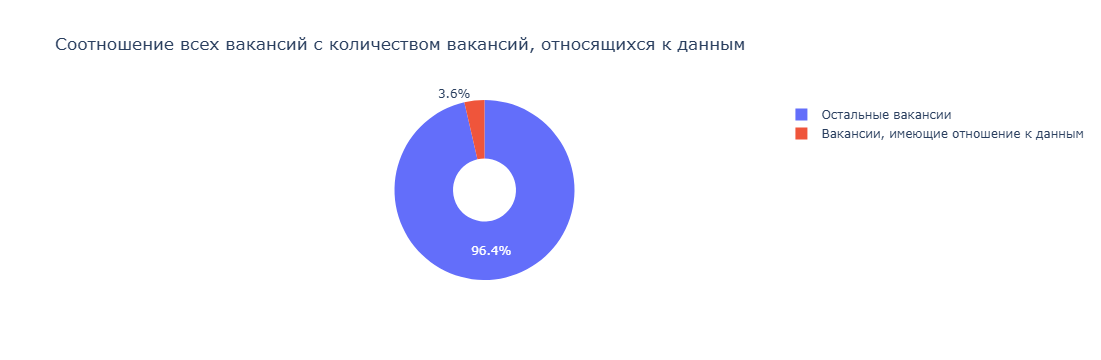

In [57]:
answers_list = [answer_6_1.cnt, answer_3_1.cnt - answer_6_1.cnt]

x = [int(item.iloc[0]) if isinstance(item, pd.Series) else int(item) for item in answers_list]

fig = px.pie(
        values = x,
        names = ['Вакансии, имеющие отношение к данным', 'Остальные вакансии'],
        title='Соотношение всех вакансий с количеством вакансий, относящихся к данным',
        hole=0.35
)

fig.show()

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [58]:
# текст запроса
query_6_2 = '''SELECT COUNT(*) AS cnt
               FROM vacancies
               WHERE (
                   name ILIKE ANY (ARRAY['%data science%', '%data scientist%', '%исследователь данных%',
                                    '%machine learning%', '%машинн%обучен%'])
                   OR name LIKE '%ML%'
                   AND name NOT LIKE '%HTML%'
               )
               AND (
                   name ILIKE '%junior%'
                   OR experience = 'Нет опыта'
                   OR employment = 'Стажировка'
               )
'''

In [59]:
# результат запроса
answer_6_2 = pd.DataFrame(conn.execute(text(query_6_2)).fetchall())
display(answer_6_2)

,cnt
0,51


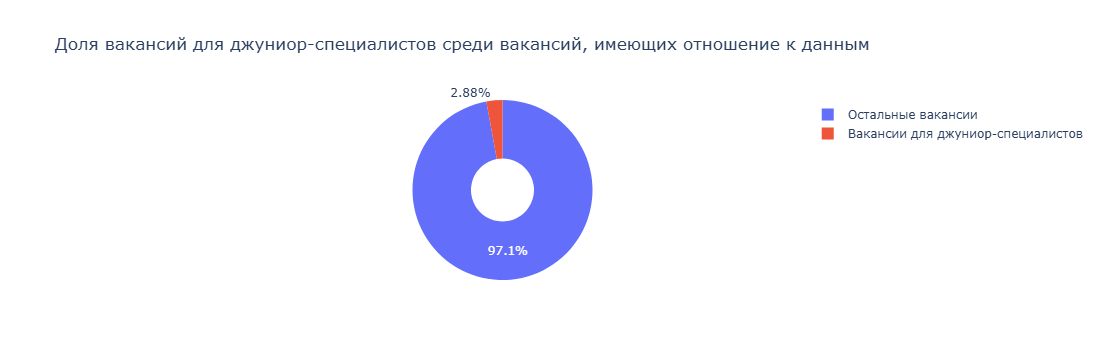

In [61]:
answers_list = [answer_6_2.cnt, answer_6_1.cnt - answer_6_2.cnt]

x = [int(item.iloc[0]) if isinstance(item, pd.Series) else int(item) for item in answers_list]

fig = px.pie(
        values = x,
        names = ['Вакансии для джуниор-специалистов', 'Остальные вакансии'],
        title='Доля вакансий для джуниор-специалистов среди вакансий, имеющих отношение к данным',
        hole=0.35
)

fig.show()

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

In [62]:
# текст запроса
query_6_3 = '''SELECT COUNT(*) AS cnt
               FROM vacancies
               WHERE (
                   name ILIKE ANY (ARRAY['%data science%', '%data scientist%',
                                         '%исследователь данных%', '%machine learning%', '%машинн%обучен%'])
                   OR name LIKE '%ML%'
                   AND name NOT LIKE '%HTML%'
               )
               AND (
                   key_skills ILIKE '%postgres%'
                   OR key_skills ILIKE '%sql%'
               )
'''

In [63]:
# результат запроса
answer_6_3 = pd.DataFrame(conn.execute(text(query_6_3)).fetchall())
display(answer_6_3)

,cnt
0,201


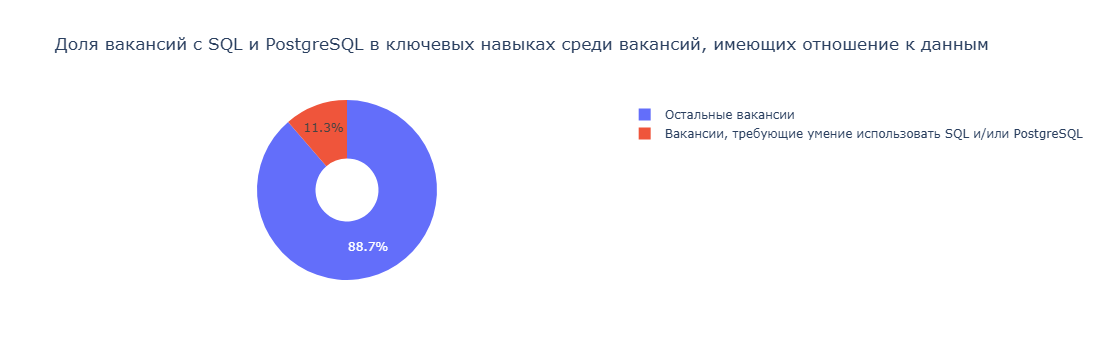

In [65]:
answers_list = [answer_6_3.cnt, answer_6_1.cnt - answer_6_3.cnt]

x = [int(item.iloc[0]) if isinstance(item, pd.Series) else int(item) for item in answers_list]

fig = px.pie(
        values = x,
        names = ['Вакансии, требующие умение использовать SQL и/или PostgreSQL', 'Остальные вакансии'],
        title='Доля вакансий с SQL и PostgreSQL в ключевых навыках среди вакансий, имеющих отношение к данным',
        hole=0.35
)

fig.show()

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

In [66]:
# текст запроса
query_6_4 = '''SELECT COUNT(*) AS cnt
               FROM vacancies
               WHERE (
                   name ILIKE ANY (ARRAY['%data science%', '%data scientist%', '%исследователь данных%',
                                         '%machine learning%', '%машинн%обучен%'])
                   OR name LIKE '%ML%'
                   AND name NOT LIKE '%HTML%'
               )
               AND (
                   key_skills ILIKE '%Python%'
                   OR key_skills ILIKE '%Питон%'
               )
'''

In [67]:
# результат запроса
answer_6_4 = pd.DataFrame(conn.execute(text(query_6_4)).fetchall())
display(answer_6_4)

,cnt
0,351


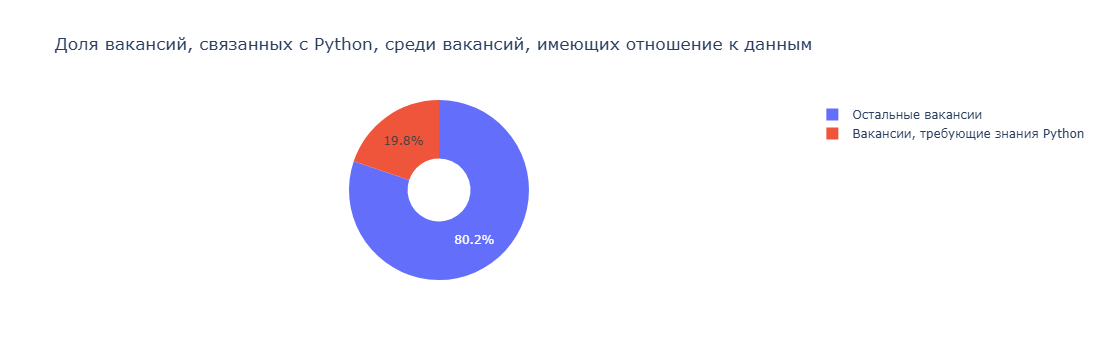

In [68]:
answers_list = [answer_6_4.cnt, answer_6_1.cnt - answer_6_4.cnt]

x = [int(item.iloc[0]) if isinstance(item, pd.Series) else int(item) for item in answers_list]

fig = px.pie(
        values = x,
        names = ['Вакансии, требующие знания Python', 'Остальные вакансии'],
        title='Доля вакансий, связанных с Python, среди вакансий, имеющих отношение к данным',
        hole=0.35
)

fig.show()

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [69]:
# текст запроса
query_6_5 = '''SELECT ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2)
               FROM vacancies
               WHERE (
                   name ILIKE ANY (ARRAY['%data science%', '%data scientist%', '%исследователь данных%',
                                         '%machine learning%', '%машинн%обучен%'])
                   OR name LIKE '%ML%'
                   AND name NOT LIKE '%HTML%'
               )
'''

In [70]:
# результат запроса
answer_6_5 = pd.DataFrame(conn.execute(text(query_6_5)).fetchall())
display(answer_6_5)

,round
0,6.41


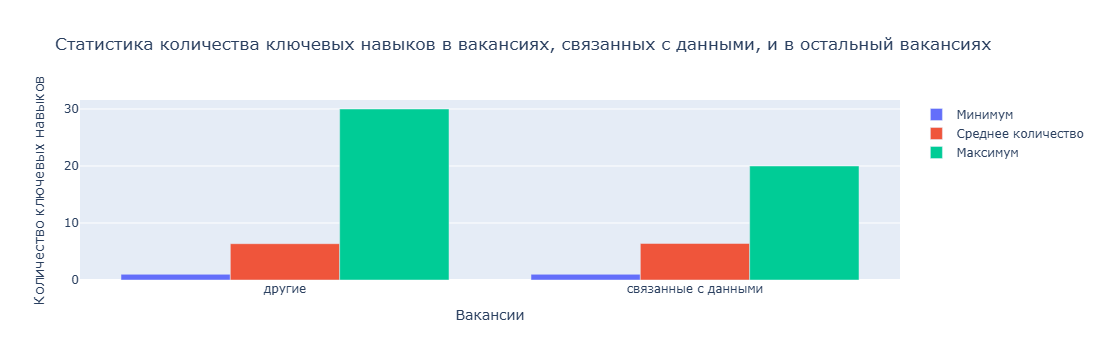

In [71]:
query_for_chart_6_5 = '''SELECT 'связанные с данными' AS vacancies, 
                         ROUND(MIN(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS minimum,
                         ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS average,
                         ROUND(MAX(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS maximum
                         FROM vacancies
                         WHERE (
                                 name ILIKE ANY (ARRAY['%data science%', '%data scientist%', '%исследователь данных%',
                                                        '%machine learning%', '%машинн%обучен%'])
                         OR name LIKE '%ML%'
                         AND name NOT LIKE '%HTML%'
                         )
                         UNION
                         SELECT 'другие' AS vacancies, 
                         ROUND(MIN(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS minimum,
                         ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS average,
                         ROUND(MAX(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS maximum
                         FROM vacancies
                         WHERE (
                                 name NOT ILIKE ANY (ARRAY['%data science%', '%data scientist%', '%исследователь данных%',
                                                           '%machine learning%', '%машинн%обучен%'])
                         AND name NOT LIKE '%ML%'
                         )
 '''               

answer_for_chart_6_5 = pd.DataFrame(conn.execute(text(query_for_chart_6_5)).fetchall())

fig = go.Figure(data=[
    go.Bar(name='Минимум', x=answer_for_chart_6_5.vacancies, y=answer_for_chart_6_5.minimum),
    go.Bar(name='Среднее количество', x=answer_for_chart_6_5.vacancies, y=answer_for_chart_6_5.average),
    go.Bar(name='Максимум', x=answer_for_chart_6_5.vacancies, y=answer_for_chart_6_5.maximum)
])

fig.update_layout(
    barmode='group',
    title='Статистика количества ключевых навыков в вакансиях, связанных с данными, и в остальный вакансиях',
    xaxis=dict(title='Вакансии'),
    yaxis=dict(title='Количество ключевых навыков')
)

fig.show()

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*).
Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [72]:
# текст запроса
query_6_6 = '''WITH ds_table AS (
                                 SELECT experience,
                                 CASE
                                     WHEN salary_to IS NOT NULL AND salary_from IS NOT NULL THEN (salary_to + salary_from) / 2
                                     WHEN salary_to IS NOT NULL THEN salary_to
                                     ELSE salary_from
                                 END AS salary
                                 FROM vacancies
                                 WHERE (name ILIKE ANY (ARRAY['%data science%', '%data scientist%', '%исследователь данных%',
                                                             '%machine learning%', '%машинн%обучен%']) OR name LIKE '%ML%')
                                     AND name NOT LIKE '%HTML%'
                                     AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
               )
               SELECT experience, ROUND(AVG(salary)) AS avg_salary
               FROM ds_table
               GROUP BY experience
               HAVING experience = 'От 3 до 6 лет'
'''

In [73]:
# результат запроса
answer_6_6 = pd.DataFrame(conn.execute(text(query_6_6)).fetchall())
display(answer_6_6)

,experience,avg_salary
0,От 3 до 6 лет,243115


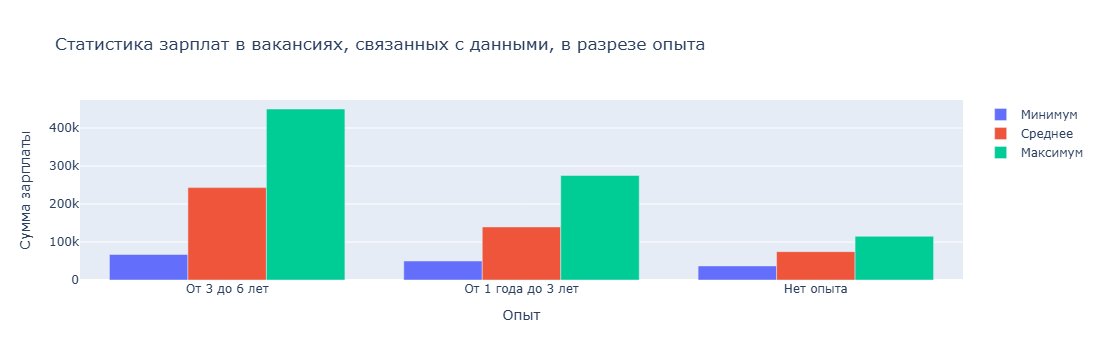

In [74]:
query_for_chart_6_6 = '''WITH ds_table AS (
                                            SELECT experience,
                                                   CASE
                                                       WHEN salary_to IS NOT NULL AND salary_from IS NOT NULL
                                                           THEN (salary_to + salary_from) / 2
                                                       WHEN salary_to IS NOT NULL THEN salary_to
                                                       ELSE salary_from
                                                   END AS salary
                                            FROM vacancies
                                            WHERE (name ILIKE ANY (ARRAY['%data science%', '%data scientist%',
                                                '%исследователь данных%', '%machine learning%', '%машинн%обучен%'])
                                                OR name LIKE '%ML%')
                                                AND name NOT LIKE '%HTML%'
                                                AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
                         )
                            SELECT experience, 
                                   ROUND(MIN(salary)) AS min_salary, 
                                   ROUND(AVG(salary)) AS avg_salary, 
                                   ROUND(MAX(salary)) AS max_salary
                            FROM ds_table
                            GROUP BY experience
 '''               

answer_for_chart_6_6 = pd.DataFrame(conn.execute(text(query_for_chart_6_6)).fetchall())

fig = go.Figure(data=[
    go.Bar(name='Минимум', x=answer_for_chart_6_6.experience, y=answer_for_chart_6_6.min_salary),
    go.Bar(name='Среднее', x=answer_for_chart_6_6.experience, y=answer_for_chart_6_6.avg_salary),
    go.Bar(name='Максимум', x=answer_for_chart_6_6.experience, y=answer_for_chart_6_6.max_salary)
])

fig.update_layout(
    barmode='group',
    title='Статистика зарплат в вакансиях, связанных с данными, в разрезе опыта',
    xaxis=dict(title='Опыт'),
    yaxis=dict(title='Сумма зарплаты')
)

fig.show()

***

### Выводы по предметному анализу
Небольшое количество вакансий в базе имеют отношение к данным, всего 3.6% (1771).<br>
Всего 2.88% (51) вакансий нацелены на джуниор-специалистов из 1771 вакансии связанных с данными. При том, что в общей базе была гораздо большая ориентация на джуниор-специалистов. Из этого следует, что в аналитике данных опыт для работодателей нашей базы имеет ключевое значение.<br>
Интересное наблюдение заключаются в том, что среднее количество ключевых навыков в вакансиях связанных и не связанных с данными примерно равное - 6.37 и 6.41, с небольшим перевесом у вакансий связанных с данными. Минимум тоже совпадает - и это 1 навык. А вот в максимуме у вакансий не нашего предметного анализа количество ключевых навыков больше в 1.5 раза. Это значит, что анализ данных требует в среднем то же количество навыков, что и большинство других сфер, и не имеет такого большого разброса в требованиях, как в некоторых других сферах.<br>
Дальше — анализ вакансий, связанных с данными.<br>
11.3% вакансий ожидают от соискателя наличие навыков работы с SQL и/или PostgreSQL. Доля довольно значительная.
19.8% вакансий ожидают от соискателей наличие навыков работы с Python. Из этого следует, что Python - один из основополагающих навыков профессии.<br>
Что касается зарплаты, есть большой разброс и он зависит, по большей части, от опыта. Минимальная зарплата специалиста без опыта - 37 тысяч рублей, средняя по вакансиям 74,643 рублей, максимальная в базе - 115 тысяч рублей. Минимальная зарплата специалиста с опытом от 1 до 3 лет - 50 тысяч рублей, средняя - 139,675 рублей, максимальная в базе - 275 тысяч рублей. Минимальная зарплата специалиса с опытом от 3 до 6 лет - 67,126 тысяч рублей, средняя - 243,115 рублей, максимальная - 450 тысяч рублей. Здесь также видно, что в сфере аналитики данных опыт имеет очень большое значение, и с изменением опыта оплата изменяется стремительно.

# Общий вывод по проекту

Мы видим, что база данных сама по себе обширная, включает разные сферы деятельности и охватывает разные страны. 67% вакансий не требуют опыта работы, из чего я делаю вывод, что, в целом, база ориентирована на молодых специалистов. Значительная часть предлагаемых вакансий в базе - дистанционные, а, значит, предполагающие интеллектуальную работу. На первых местах среди популярных сфер деятельности находятся IT и интернет услуги. Только в середине топ-листа появляется торговля и в конце - производство и строительство. <br>
В базе есть недочёты в заполнении информации со стороны работодателей: более половины работодателей не указывают зарплату для вакансий, более чем треть компаний не прописывают сферу деятельности, некоторые работодатели прописывают место регистрации не в формате города, а в формате страны. Все это может сказываться на корректности поиска вакансий, поэтому следовало бы запросить дополнительные данные и проанализировать, как каждый из недочётов влияет на работу базы. Исходя из результатов, спрогнозировать наилучшее решение. <br>
Также, в Минске и Санкт-Петербурге количество работодателей составляет больше половины числа вакансий. А в Москве работодателей и вовсе больше, чем вакансий. Это говорит о том, что в базе есть работодатели, которые зарегистрированны на платформе, но не публикуют вакансии. Здесь тоже следовало бы проанализировать приемлемое ли место хранилища заполняют эти бесполезные данные. Если нет, то стоит ввести модерацию работодателей, контролировать их активность. <br>
Малая часть вакансий относится к данным, и еще меньшая часть из них ориентирована на джуниор-специалистов. Анализ данных требует в среднем то же количество навыков, что и большинство других сфер, и не имеет слишком большого разброса в требованиях. SQL, PostgreSQL и Python - важные навыки для соискателя вакансий в сфере данных. Зарплата у дата-саентистов сильно зависит от опыта. 